<a href="https://colab.research.google.com/github/manishsingh7163/ML-on-Banglore-Rental-House/blob/Analysis-on-Satellite-Image/Ploting_Data_on_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install geopandas
!pip install geoplot
!pip install folium pandas

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import geoplot
import geoplot.crs as gcrs
import folium


In [31]:
bang = gpd.read_file("/content/drive/MyDrive/Microservice ML task/bangaloreWards.GeoJSON")
df = pd.read_csv("/content/drive/MyDrive/Microservice ML task/Final CSV for Banglore Rental.csv")
print(bang)

     OBJECTID  ...                                           geometry
0           1  ...  MULTIPOLYGON (((77.59229 13.09720, 77.59094 13...
1           2  ...  MULTIPOLYGON (((77.56862 13.12705, 77.57064 13...
2           3  ...  MULTIPOLYGON (((77.59094 13.09842, 77.59229 13...
3           4  ...  MULTIPOLYGON (((77.67683 13.01147, 77.67695 13...
4           5  ...  MULTIPOLYGON (((77.72899 13.02061, 77.72994 13...
..        ...  ...                                                ...
193       194  ...  MULTIPOLYGON (((77.61399 12.92347, 77.61419 12...
194       195  ...  MULTIPOLYGON (((77.68336 13.05192, 77.68384 13...
195       196  ...  MULTIPOLYGON (((77.64931 13.07853, 77.64993 13...
196       197  ...  MULTIPOLYGON (((77.68549 12.94121, 77.68539 12...
197       198  ...  MULTIPOLYGON (((77.49854 12.92574, 77.49854 12...

[198 rows x 15 columns]


In [ ]:
df.head()

In [32]:
bang.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

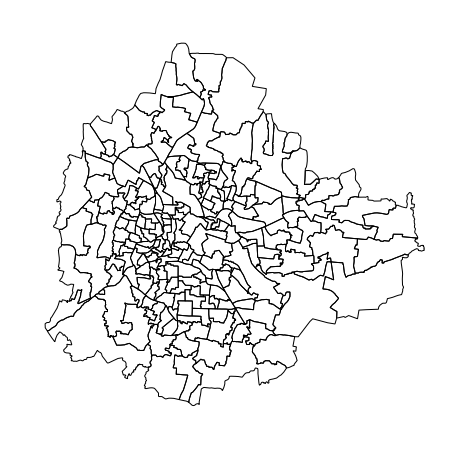

In [33]:
geoplot.polyplot(bang, figsize=(12, 8))

In [34]:

m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

In [35]:
for i in range(len(df)):
  x = str(df["Rent(Rs)"][i])
  r = df["Area(sqft)"][i]/100
  loc = [df["Longitude"][i], df["Latitude"][i]]
  marker = folium.CircleMarker(
      location=loc,
      radius=r,
      popup=x,
      color='#cc5031',
      fill_color='#ccc731',
      tooltip=x)
  marker.add_to(m)
m

The Circle's radius depends on the area of the Flat and one can check the price by moving the cursor on circle.

In [36]:
m = folium.Map([12.9716, 77.5946], zoom_start=12)

folium.GeoJson(bang).add_to(m)

m